In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory

## Data Preparation

In [2]:
training_set=image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 76515 files belonging to 4 classes.


In [3]:
validation_set=image_dataset_from_directory(
    "val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 21861 files belonging to 4 classes.


In [4]:
INPUT_SHAPE=(224,224,3)

## Model Creating

In [5]:
mobnet=tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

22661472/22661472 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step 


In [6]:
model=tf.keras.models.Sequential()

In [7]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [8]:
model.add(mobnet)

In [9]:
#output layer
model.add(tf.keras.layers.Dense(units=4,activation="softmax"))

In [10]:
metrics_list=["accuracy",tf.keras.metrics.F1Score()]

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=metrics_list)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

## Model Training

In [13]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3610s 2s/step - accuracy: 0.7915 - f1_score: 0.4377 - loss: 1.2249 - val_accuracy: 0.8043 - val_f1_score: 0.4450 - val_loss: 0.9732
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3677s 2s/step - accuracy: 0.8669 - f1_score: 0.6404 - loss: 0.9029 - val_accuracy: 0.8937 - val_f1_score: 0.6946 - val_loss: 0.7264
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3629s 2s/step - accuracy: 0.9119 - f1_score: 0.7616 - loss: 0.6798 - val_accuracy: 0.9507 - val_f1_score: 0.9164 - val_loss: 0.5594
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3522s 1s/step - accuracy: 0.9582 - f1_score: 0.9253 - loss: 0.5214 - val_accuracy: 0.9589 - val_f1_score: 0.9247 - val_loss: 0.4378
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3508s 1s/step - accuracy: 0.9647 - f1_score: 0.9376 - loss: 0.4027 - val_accuracy: 0.9628 - val_f1_score: 0.9363 - val_loss: 0.3445
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3500s 1s/step - accuracy: 0.9666 - f1_score: 0.9419 - loss: 0.3160 - val_accuracy: 0.966

## Saving Model

In [14]:
model.save("Trained_Eye_Disease_Model.keras")

In [15]:
model.save("Trained_Eye_Disease_Model.h5")

In [16]:
training_history.history

{'accuracy': [0.8022348284721375,
  0.885721743106842,
  0.930314302444458,
  0.9581912159919739,
  0.9634973406791687,
  0.9668822884559631,
  0.9710514545440674,
  0.9759654998779297,
  0.980095386505127,
  0.9832581877708435,
  0.9845781922340393,
  0.9869698882102966,
  0.9880938529968262,
  0.9888126254081726,
  0.9904332756996155],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=
  array([8.903983e-01, 0.000000e+00, 6.439148e-04, 8.813241e-01],
        dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.92508906, 0.8753187 , 0.        , 0.9313321 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.93056315, 0.9216075 , 0.58526844, 0.9772511 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96319735, 0.9366288 , 0.82230884, 0.9819879 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96842504, 0.9482121 , 0.8454479 , 0.9839004 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dty

In [17]:
#Saving History
import pickle
with open("Training_history.pkl","wb") as f:
    pickle.dump(training_history.history,f)

In [19]:
#Loading history from pickle file
import pickle
with open("Training_history.pkl","rb") as f:
    load_history=pickle.load(f)
print(load_history)

{'accuracy': [0.8022348284721375, 0.885721743106842, 0.930314302444458, 0.9581912159919739, 0.9634973406791687, 0.9668822884559631, 0.9710514545440674, 0.9759654998779297, 0.980095386505127, 0.9832581877708435, 0.9845781922340393, 0.9869698882102966, 0.9880938529968262, 0.9888126254081726, 0.9904332756996155], 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([8.903983e-01, 0.000000e+00, 6.439148e-04, 8.813241e-01],
      dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.92508906, 0.8753187 , 0.        , 0.9313321 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.93056315, 0.9216075 , 0.58526844, 0.9772511 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96319735, 0.9366288 , 0.82230884, 0.9819879 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96842504, 0.9482121 , 0.8454479 , 0.9839004 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.97081566, 0.9533

In [20]:
load_history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'val_accuracy', 'val_f1_score', 'val_loss'])

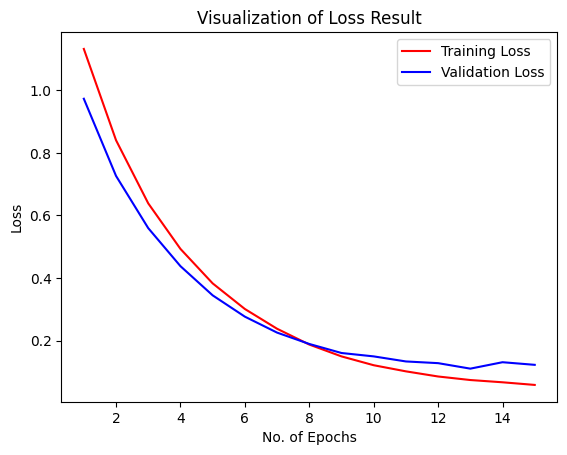

In [21]:
#Loss Visualisation
epochs=[i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

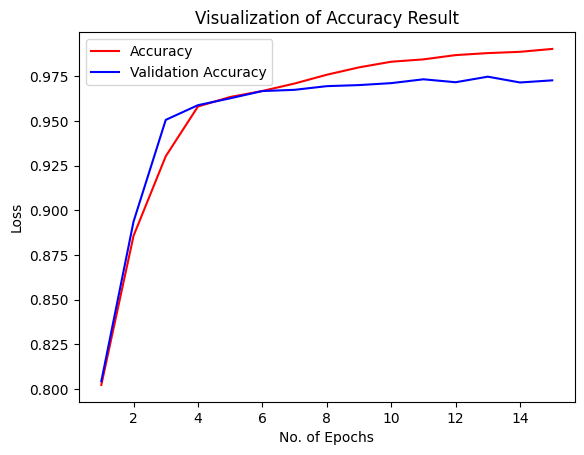

In [22]:
#Accuracy Visualisation
epochs=[i for i in range(1,16)]
plt.plot(epochs,load_history['accuracy'],color='red',label='Accuracy')
plt.plot(epochs,load_history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Evaluation model

In [23]:
model=tf.keras.models.load_model("Trained_Eye_Disease_Model.keras")

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,485,510 (62.89 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 10,974,074 (41.86 MB)

In [31]:
test_set=image_dataset_from_directory(
    "test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 10933 files belonging to 4 classes.


In [32]:
test_loss,test_acc,f1_score=model.evaluate(test_set)

342/342 ━━━━━━━━━━━━━━━━━━━━ 112s 327ms/step - accuracy: 0.9703 - f1_score: 0.6345 - loss: 0.1280


In [33]:
test_loss,test_acc,f1_score

(0.13508188724517822,
 0.9695417284965515,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.97760594, 0.9468555 , 0.87666464, 0.9841025 ], dtype=float32)>)

In [34]:
#Computing True label from test set
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [35]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [36]:
#Computing Predicted labels using test_set
predicted_categories=model.predict(test_set)
predicted_categories

342/342 ━━━━━━━━━━━━━━━━━━━━ 109s 319ms/step


array([[0.9844924 , 0.00453697, 0.00661464, 0.00435597],
       [0.9844924 , 0.00453697, 0.00661464, 0.00435597],
       [0.9844924 , 0.00453697, 0.00661464, 0.00435597],
       ...,
       [0.00284306, 0.00360236, 0.00527705, 0.9882776 ],
       [0.00284306, 0.00360236, 0.00527705, 0.9882776 ],
       [0.00284306, 0.00360236, 0.00527705, 0.9882776 ]], dtype=float32)

In [37]:
Y_Pred=tf.argmax(predicted_categories,axis=1)
Y_Pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

### 1. Classification Report

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_Pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3746
           1       0.97      0.92      0.95      1161
           2       0.90      0.85      0.88       887
           3       0.97      0.99      0.98      5139

    accuracy                           0.97     10933
   macro avg       0.96      0.94      0.95     10933
weighted avg       0.97      0.97      0.97     10933



In [39]:
### 2. Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_true,Y_Pred)
cm

array([[3667,   10,   60,    9],
       [  16, 1069,    4,   72],
       [  69,    9,  757,   52],
       [   4,    9,   19, 5107]])

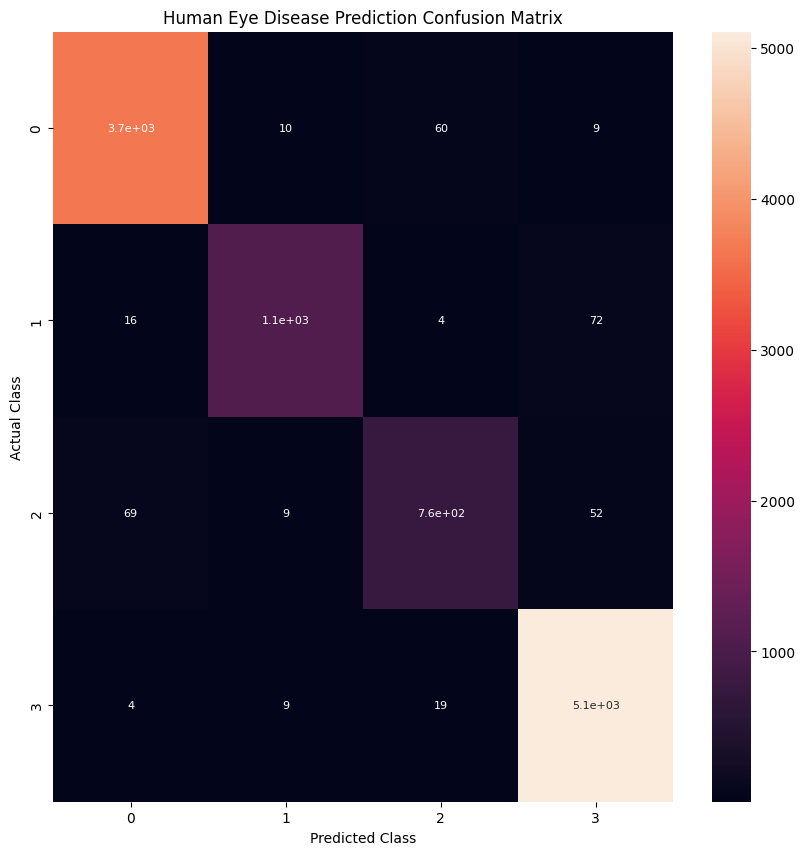

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()